In [63]:
%load_ext autoreload
%autoreload 2


import synapseclient as sc
import pandas as pd
import sys
import warnings
import nbconvert
sys.path.append("../../src")

import utils.munging_utils as query
import utils.viz_utils as viz
import utils.preprocessing_utils as proc
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")
sns.set_style("dark")
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
data = query.get_file_entity("syn21281633")
metadata = data[['MS', 'PD', 'age', 'appVersion', 'createdOn', 
                'gender', 'healthCode', 'phoneInfo', 'recordId', 
                'version', 'duration', "is_control"]].drop_duplicates(subset = "healthCode", keep = "last")

median_grouped_data = proc.collapseFeatures(aggregation_type = "median") \
                            .transform(data[[feat for feat in data.columns if ("." in feat) or ("healthCode" in feat)]]) \
                            .reset_index()
median_grouped_data = pd.merge(median_grouped_data, 
                               metadata, 
                               on = "healthCode", how = "left")

max_grouped_data = proc.collapseFeatures(aggregation_type = "max") \
                        .transform(data[[feat for feat in data.columns if ("." in feat) or ("healthCode" in feat)]]) \
                        .reset_index()
max_grouped_data = pd.merge(max_grouped_data, metadata, on = "healthCode", how = "left")

In [113]:
print("#### SUMMARY STATS ####\n")

print("Number of healthcodes : %s" %len(data["healthCode"].unique()))
print("Number of records     : %s" %data.shape[0])
print("Number of V1 data     : %s" %data[data["version"] == "V1"].shape[0])
print("Number of V2 data     : %s" %data[data["version"] == "V2"].shape[0])
print("Number of Passive data: %s" %data[data["version"] == "Passive"].shape[0])
print("Number of EMS data    : %s" %data[data["version"] == "EMS_active"].shape[0])

#### SUMMARY STATS ####

Number of healthcodes : 5263
Number of records     : 129893
Number of V1 data     : 74641
Number of V2 data     : 7891
Number of Passive data: 42609
Number of EMS data    : 4752


# Introduction

This notebook explores how each PDKIT features are being distributed in each age groups.
The feature naming convention is {coordinate orientation}.name_of_the_feature

### Coordinate Orientation: 
 - <b>x<b> : feature computation on x-axis
 - <b>y<b> : feature computation on y-axis
 - <b>z<b> : feature computation on z-axis
 - <b>AA<b>: feature computation on resultant signals
 - <b>FC<b>: feature combination of feature in x, y and z 
 
Note:
 - Feature combination (FC) is observably a more reliable feature when compared to the computed resultant signals (AA) 
 - For illustration, only FC data will be taken for visualization

# 1.) Distribution of Features in Controls Accross Age Bins (per records)

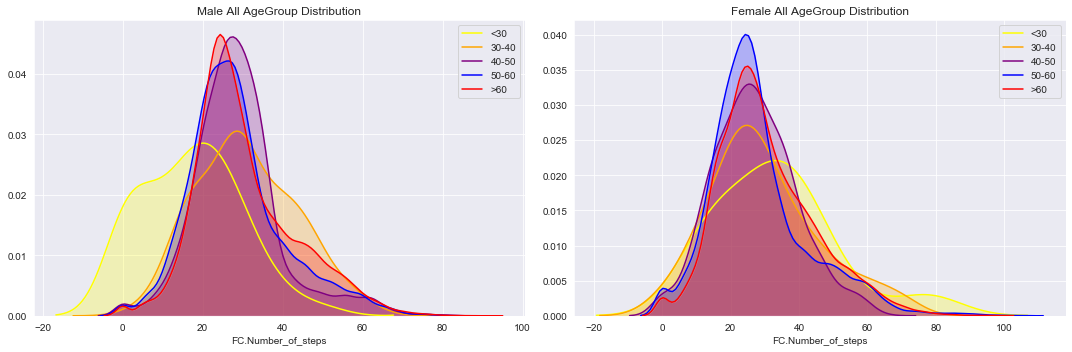

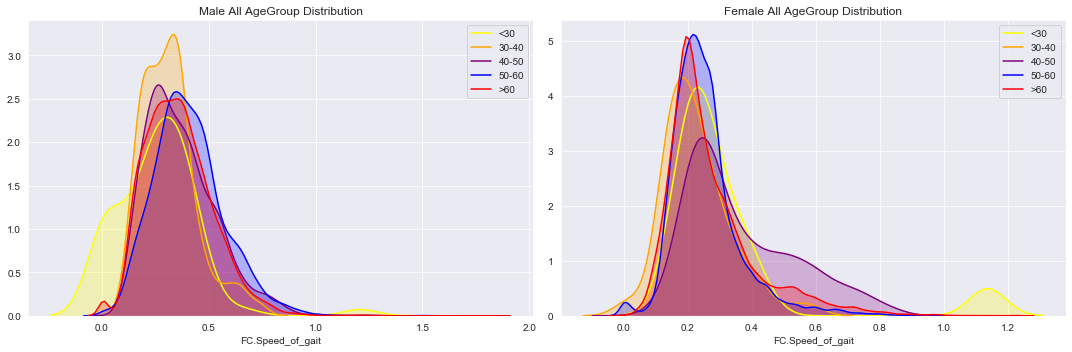

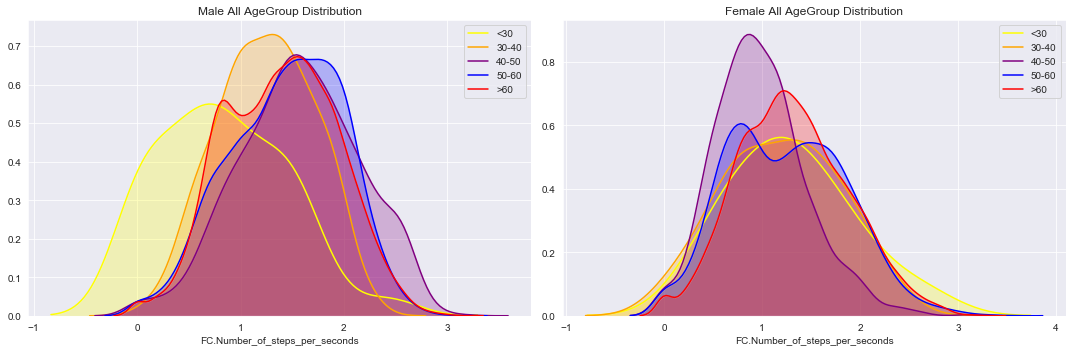

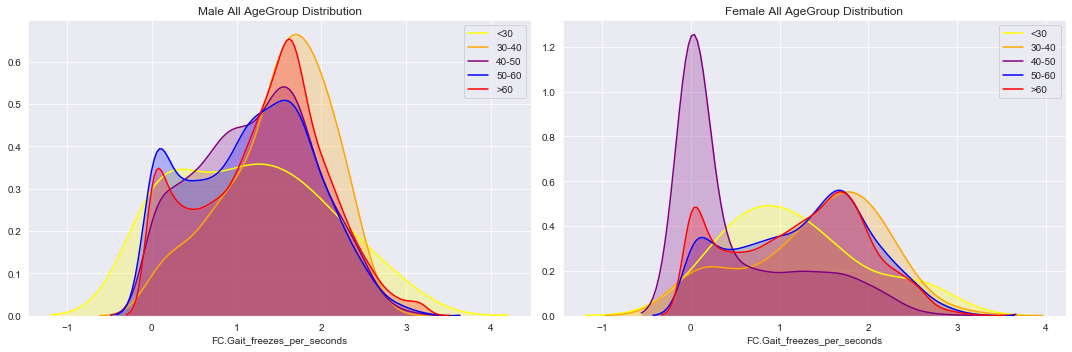

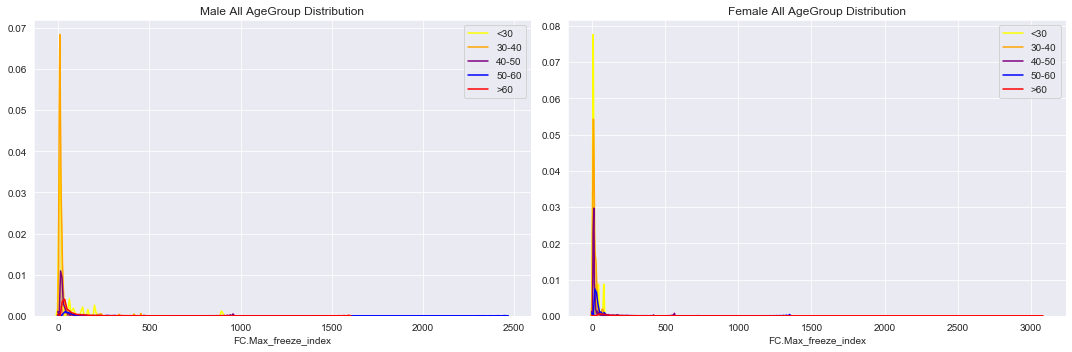

In [81]:
## Number of Steps
for feature in [feat for feat in data.columns if ("FC" in feat)]:
    viz.visualize_agegroups(data[(data["is_control"] == 1)], feature)

# 2.) Distribution of Feature Accross Subgroups (per healthCode averages)

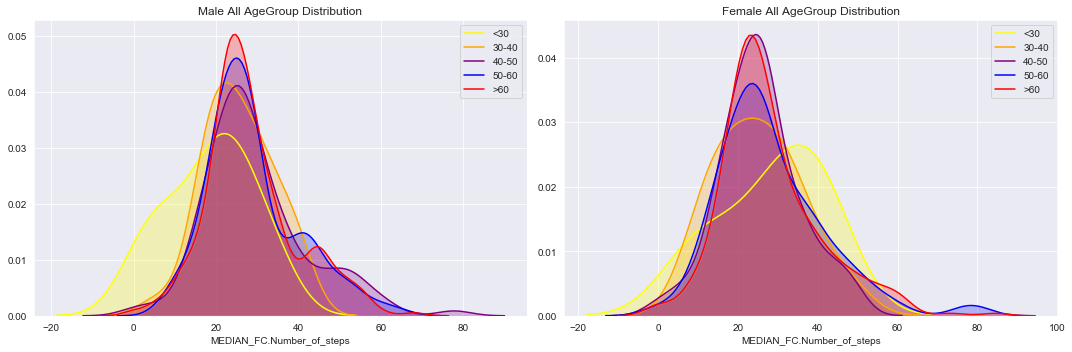

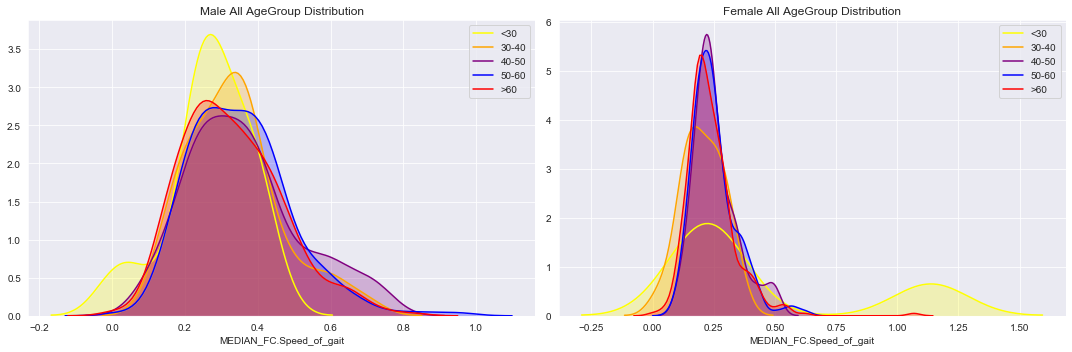

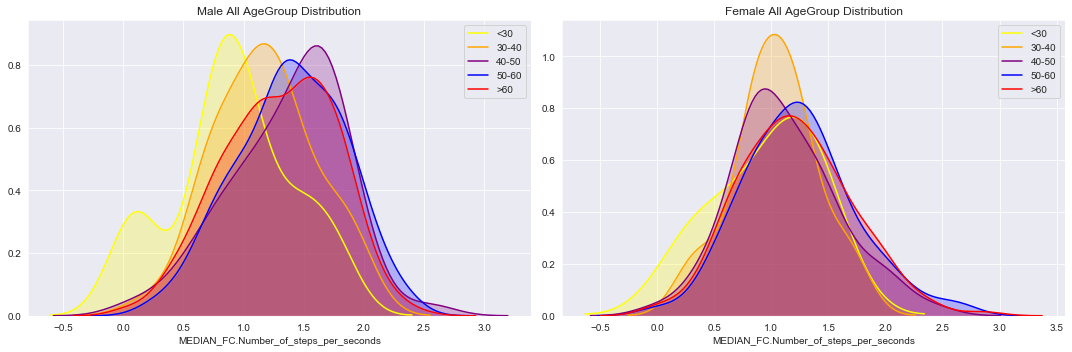

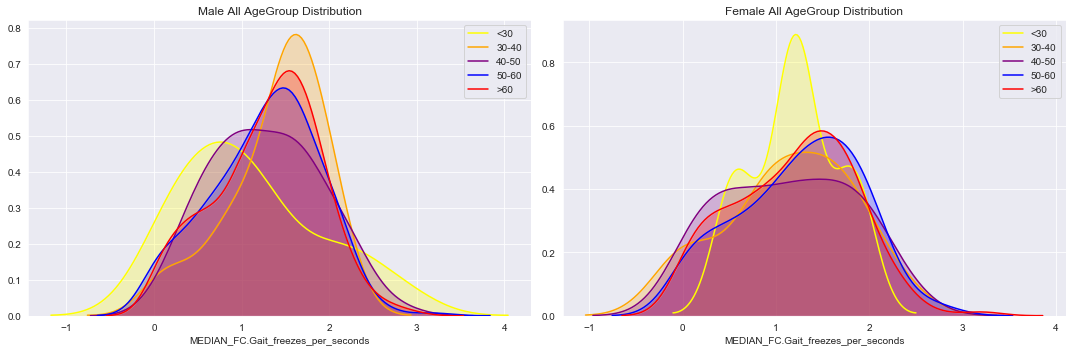

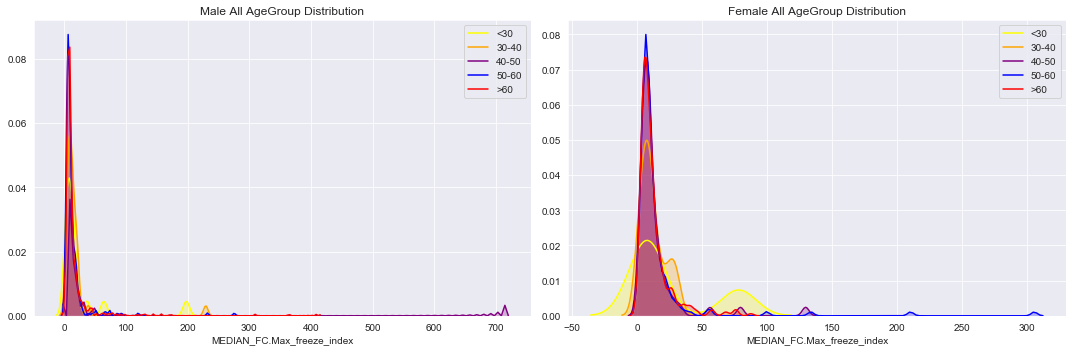

In [110]:
for feature in [feat for feat in median_grouped_data.columns if ("FC" in feat)]:
    viz.visualize_agegroups(median_grouped_data[(median_grouped_data["is_control"] == 1)], feature)

# 3.) Distribution of Feature Accross Subgroups (per healthCode Maximum)

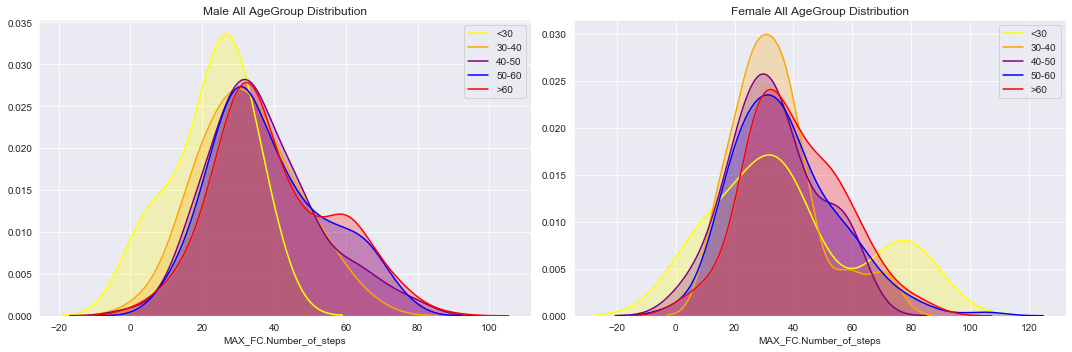

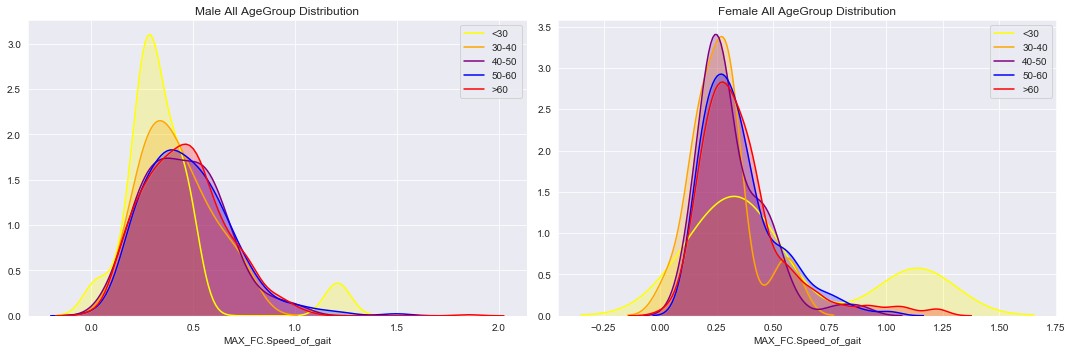

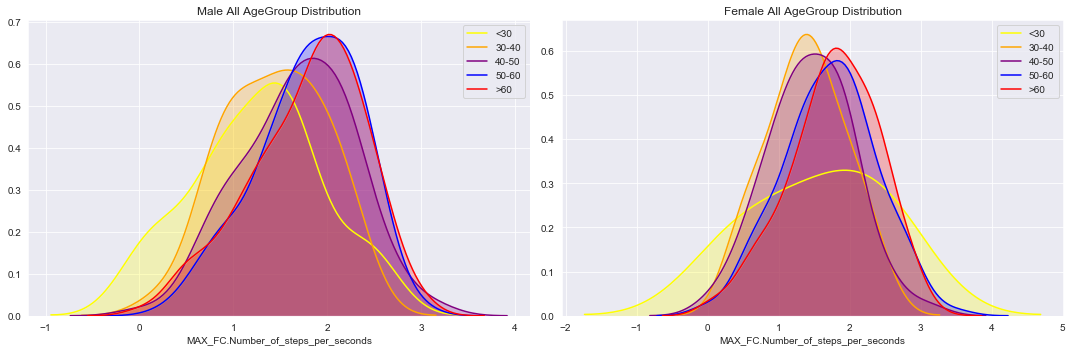

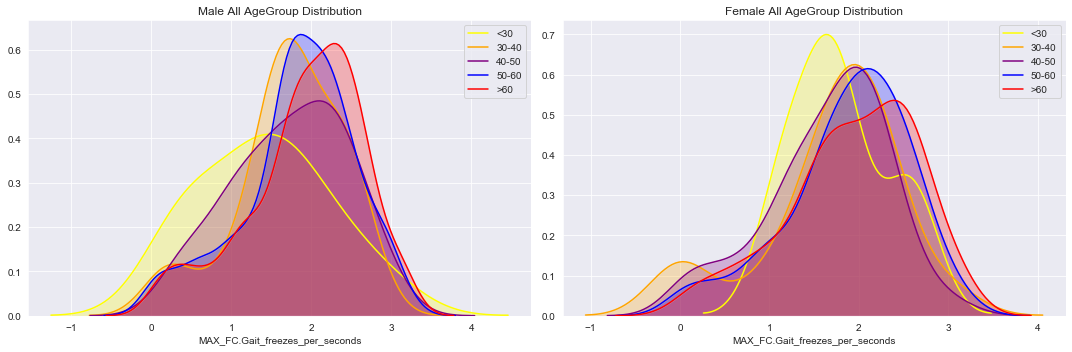

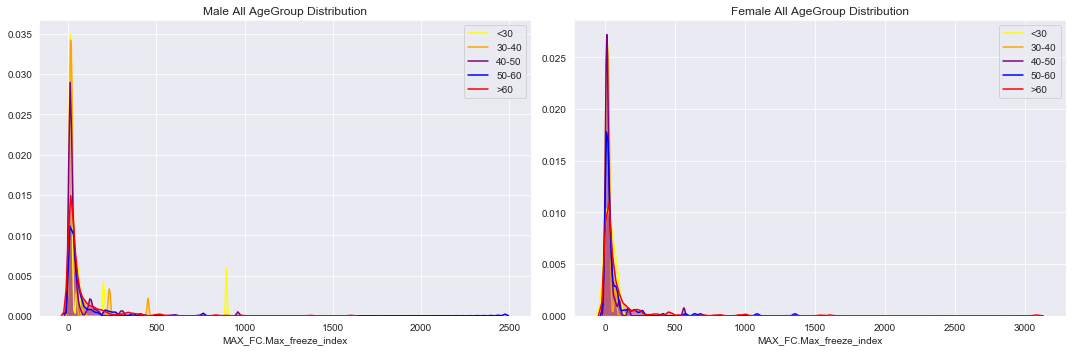

In [84]:
for feature in [feat for feat in max_grouped_data.columns if ("FC" in feat)]:
    viz.visualize_agegroups(max_grouped_data[(max_grouped_data["is_control"] == 1)], feature)

# 4.) Distribution of Control vs MS vs PD (per records)

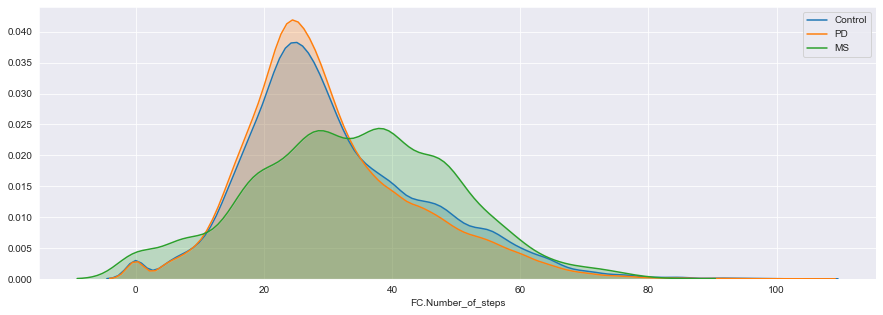

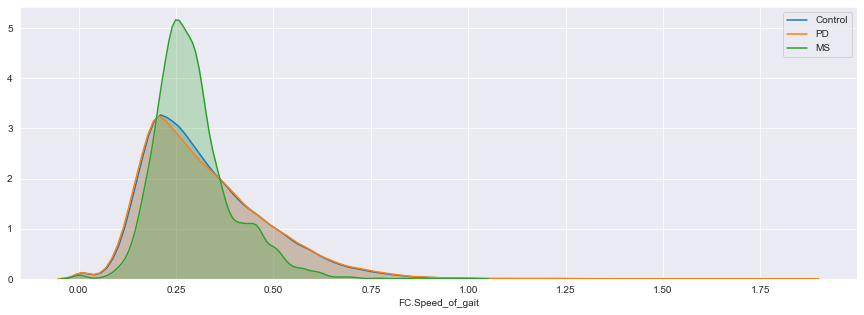

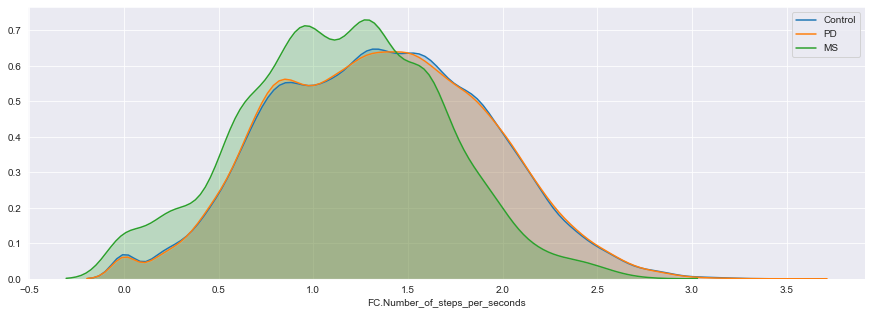

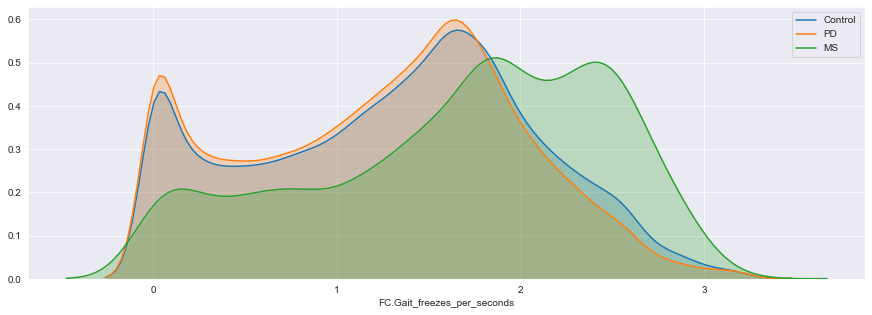

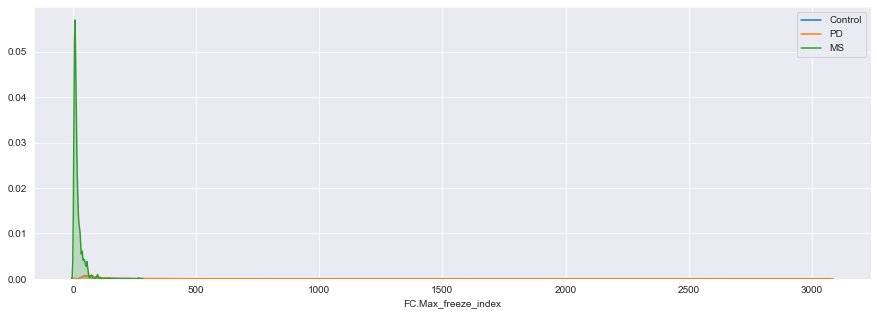

In [86]:
for feature in [feat for feat in data.columns if "FC" in feat]:
    viz.visualize_groupComparisons(data[data["version"] != "Passive"], feature)

# 5.) Distribution of Control vs MS vs PD (per healthCodes average)

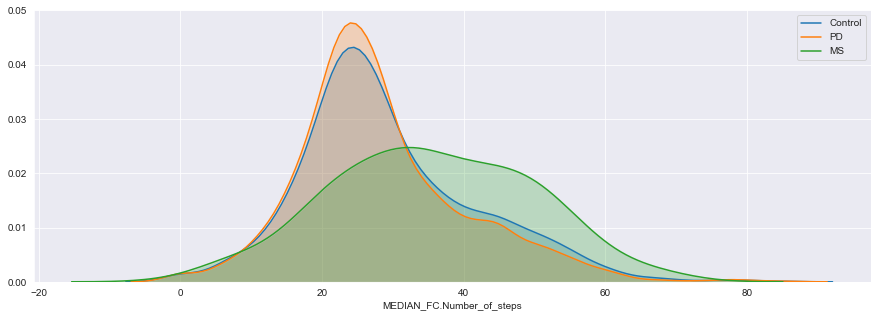

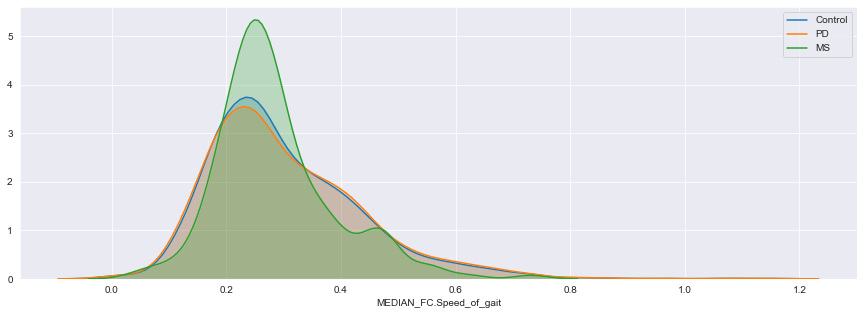

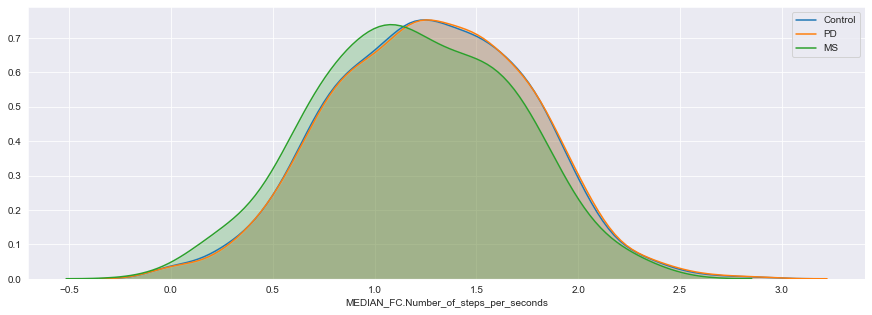

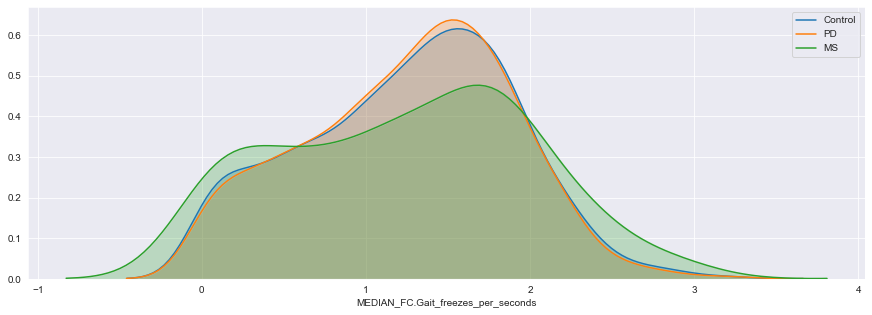

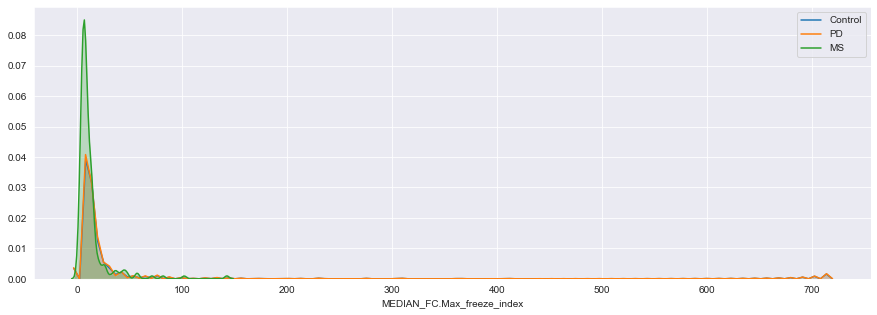

In [111]:
for feature in [feat for feat in median_grouped_data.columns if ("FC" in feat)]:
    viz.visualize_groupComparisons(median_grouped_data[median_grouped_data["version"] != "Passive"], feature)

# 6.) Distribution of Control vs MS vs PD (per healthCode maximum)

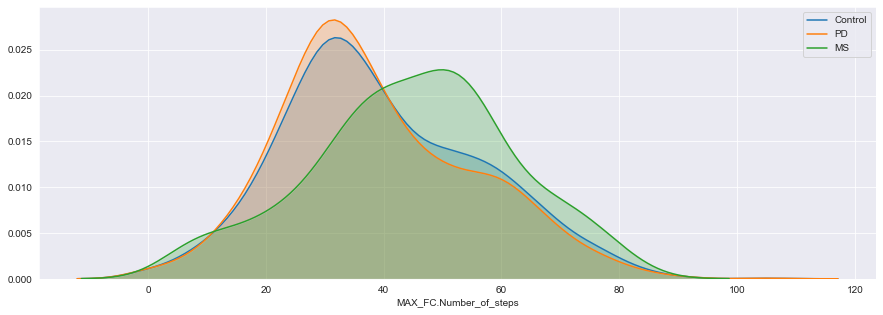

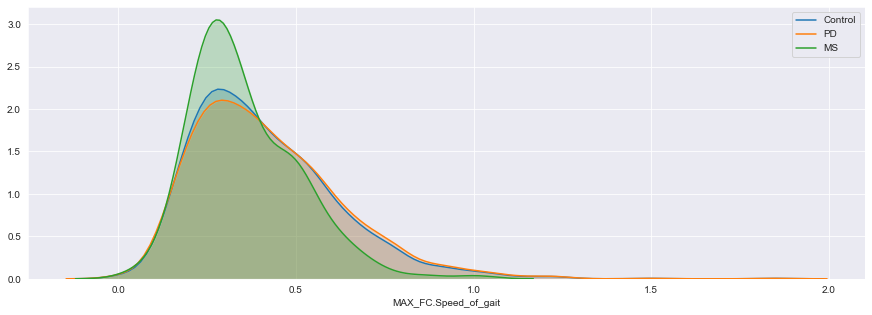

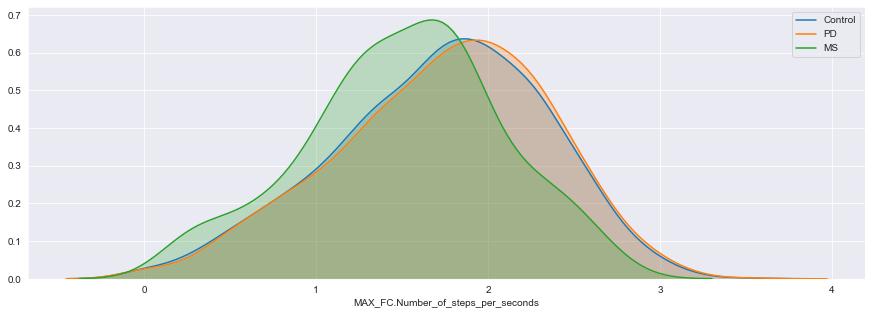

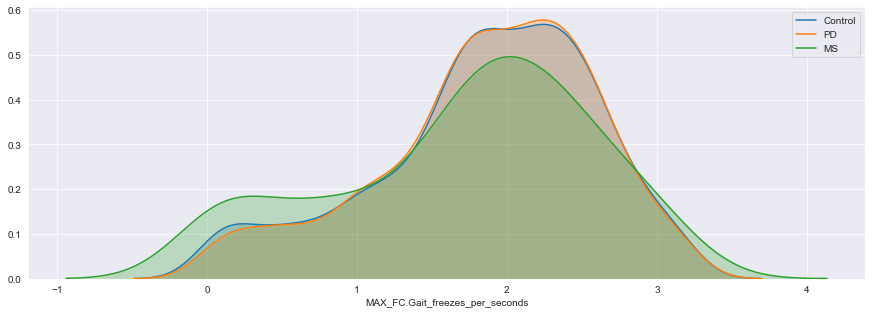

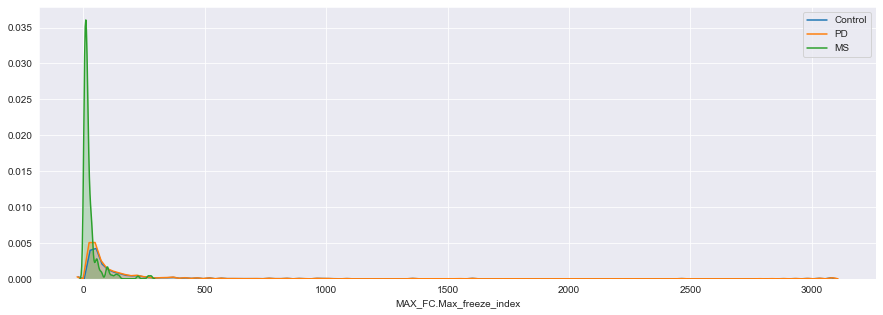

In [87]:
for feature in [feat for feat in max_grouped_data.columns if ("FC" in feat)]:
    viz.visualize_groupComparisons(max_grouped_data[max_grouped_data["version"] != "Passive"], feature)

# 7.) PD-ACTIVE vs PD-PASSIVE (per recordIds)

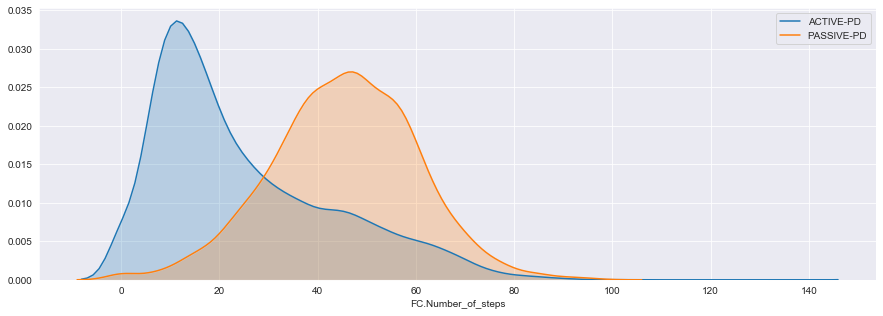

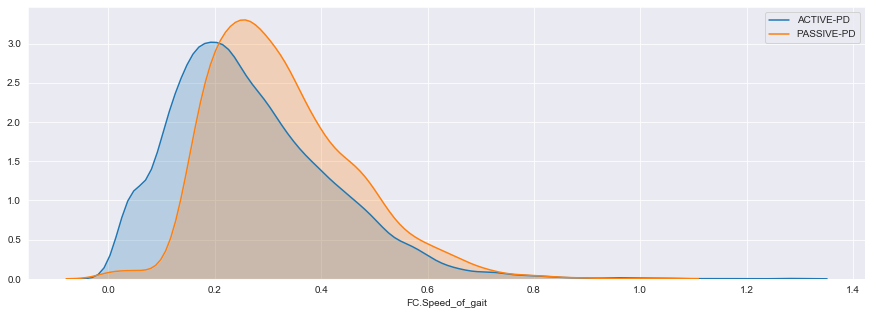

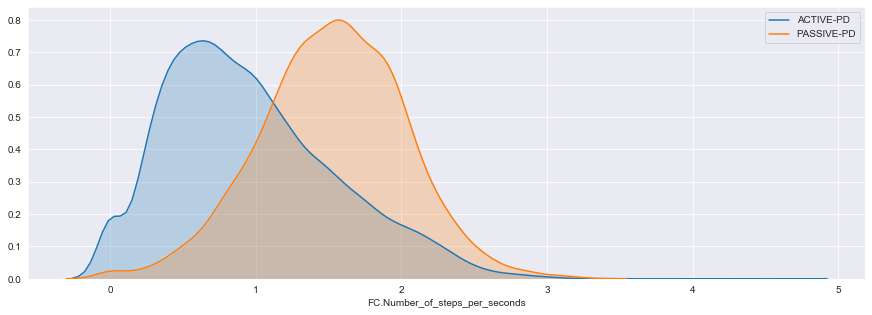

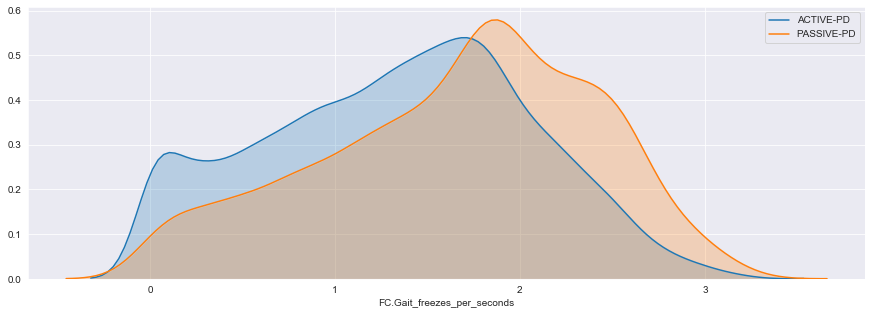

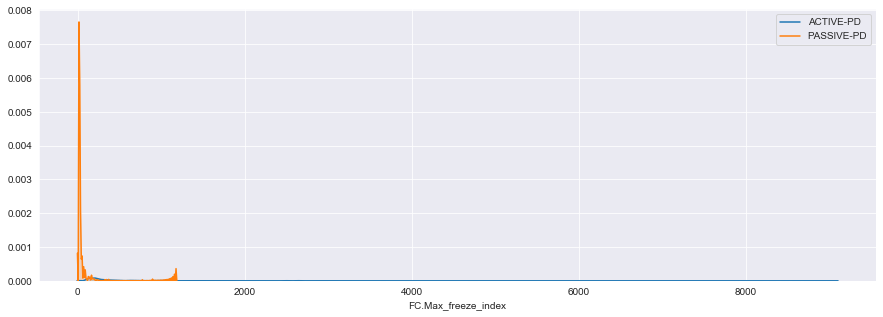

In [88]:
for feature in [feat for feat in data.columns if "FC" in feat]:
    viz.visualize_passive_active(data, feature)

# 8.) PD-ACTIVE vs PD-PASSIVE (per healthCode Averages)

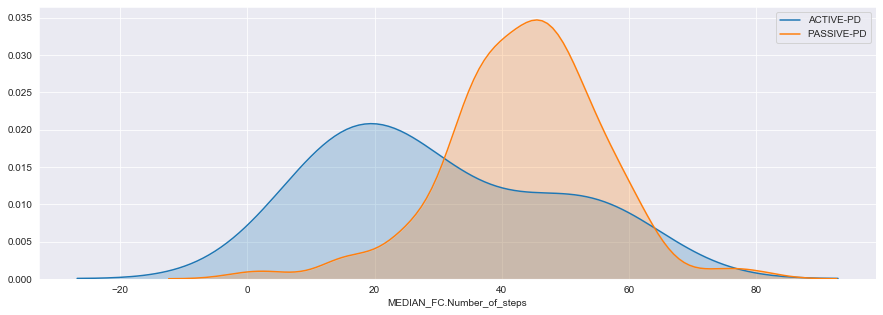

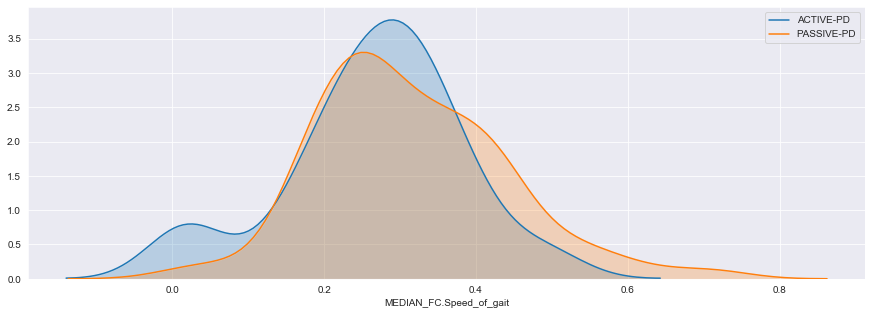

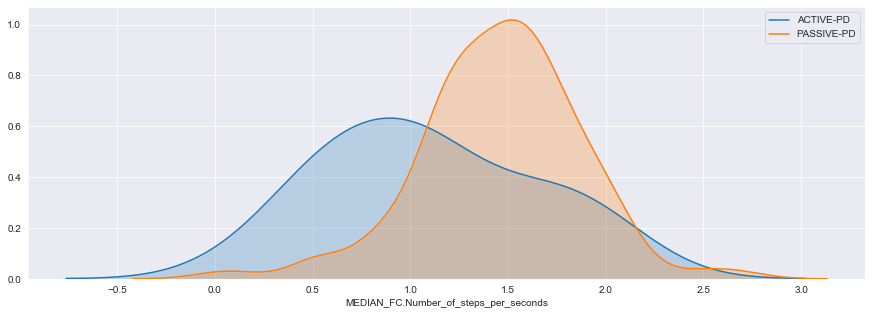

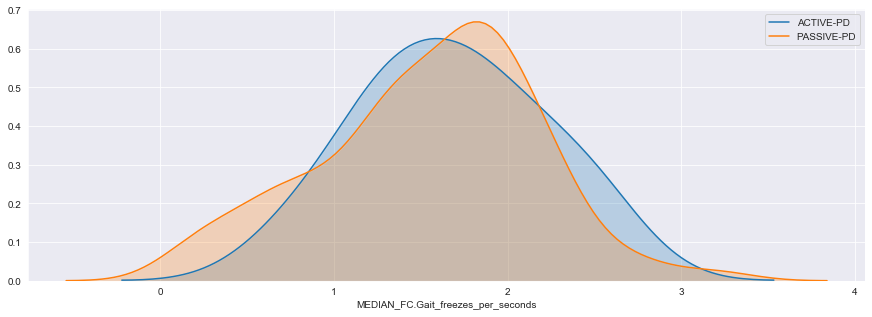

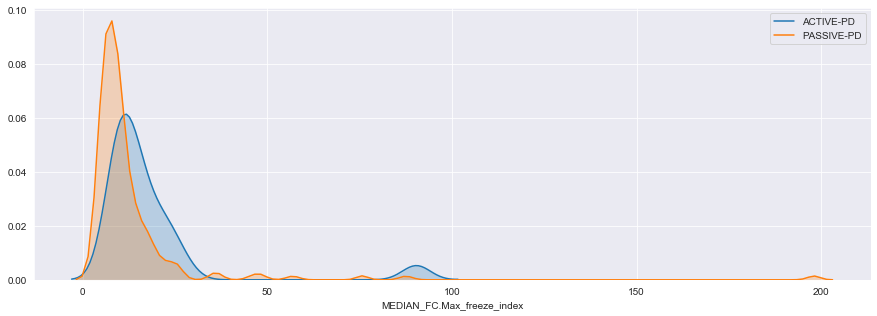

In [112]:
for feature in [feat for feat in median_grouped_data.columns if "FC" in feat]:
    viz.visualize_passive_active(median_grouped_data, feature)

# 9.) PD-ACTIVE vs PD-PASSIVE (per healthCode Maximums)

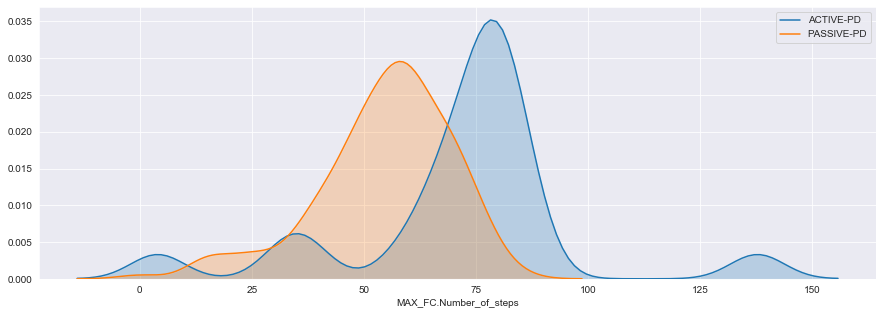

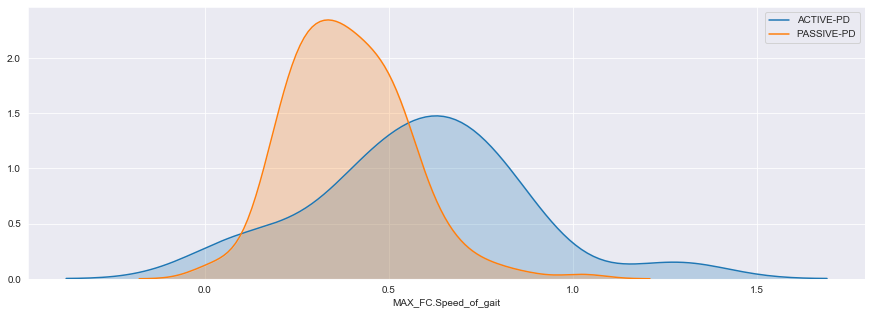

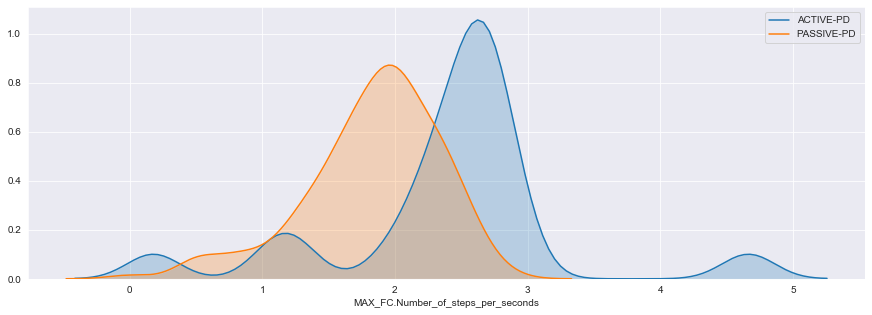

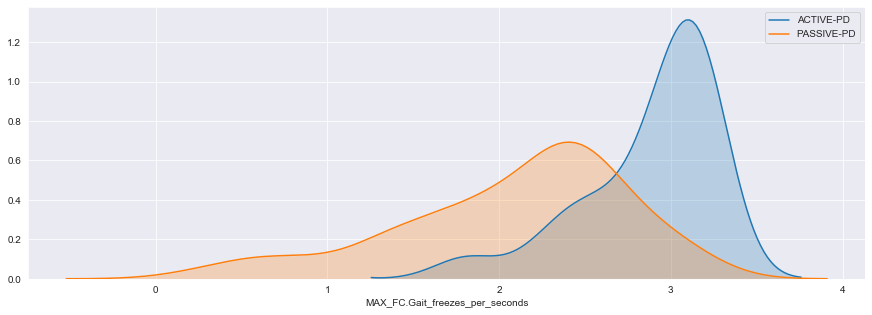

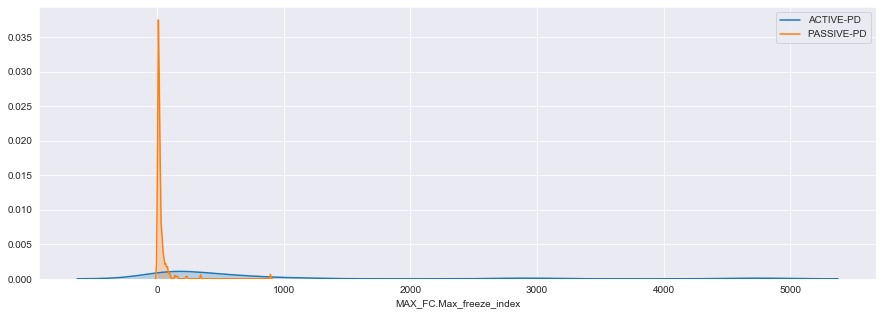

In [94]:
for feature in [feat for feat in max_grouped_data.columns if "FC" in feat]:
    viz.visualize_passive_active(max_grouped_data, feature)